In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

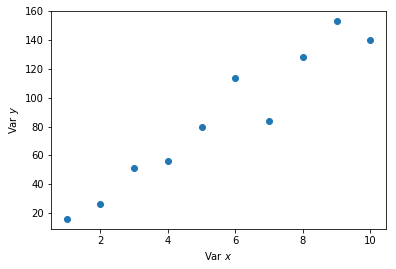

In [ ]:
np.random.seed(42) #Fijamos la semilla aleatoria

x = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
y = np.random.randint(10, 20, size=10) * x # Vamos a generar 10 numeros aleatorios entre 10 y 20, luego lo multiplicamos con nuestra variable x


plt.scatter(x,y) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var $x$")
plt.ylabel("Var $y$")
plt.show()

# Dinámica 1: 

Implementar la primera forma de cada uno de los parametros:

$\Large \hat{\beta_1} = \frac{(\sum x \sum y) - (n\sum xy)}{(\sum x)^2 - n\sum x^2}$ y $\Large \hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n}$

- Compruebe que los valores de obtenidos con la primera forma y la segunda forma son iguales
- ¿Qué pasaría con nuestros coeficientes si cambiamos la forma de generar nuestra variable dependiente $Y$? Fije una semilla y reemplaze el operador utilizado (en vez de multiplicar por $x$, cambiar por ej: suma)


In [ ]:
# Implementación de la primera forma
beta_1 = ((np.sum(x) * np.sum(y)) - (len(x) * np.sum(x*y))) / ((np.sum(x))**2 - (len(x) * np.sum(x**2)))
beta_0 = (np.sum(y) - (beta_1 * np.sum(x))) / len(x)

print(beta_1,beta_0)

15.2 1.2


# Fin Dinámica 1

# Dinámica 2: Predicción del consumo de cerverza

Este set de datos, fue recolectado en São Paulo - Brasil. Especificamente en un area universitaria con grupos de estudiantes entre 18 a 28 años de edad. Existen 7 variables en este set de datos:

- Data: la fecha en que se tomo la medición
- Temperatura Media (C): la temperatura promedio durante todo un dia
- Temperatura Minima (C): la temperatura minima durante todo un dia
- Temperatura Maxima (C): la temperatura maxima durante todo un dia
- Precipitacao (mm): cantidad de mm de precipitaciones (lluvia):
- Final de Semana: Si era fin de semana (o no).
- **Consumo de cerveja (litros)**: La cantidad de cervezas consumidas en promedio de los grupos.

Esta ultima variable, corresponde a nuestra variable dependiente. La dinámica consiste en encontrar la variable independiente que explique mejor el Consumo de cerveza. Ante esto, deberan ajustar $5$ modelos de regresión lineal simple y obtener las métricas de bondad de ajuste y de errores para cada uno de estos modelos. Indique cual fue esta variable e imprima por pantalla cuales fueron los valores de $R^2$ y $MAE$,$MAPE$ y $MSE$. Finalmente, haga el grafico de la regresión lineal mostrando los errores obtenidos por la variable mas explicativa.

In [3]:

cerveza_df = pd.read_csv("http://srodriguez.me/Datasets/Consumo_cerveja.csv")

cerveza_df.head()

NameError: name 'pd' is not defined

In [4]:
cerveza_df.info()

NameError: name 'cerveza_df' is not defined

In [ ]:
X1 = cerveza_df['Temperatura Media (C)']
X2 = cerveza_df['Temperatura Minima (C)']
X3 = cerveza_df['Temperatura Maxima (C)']
X4 = cerveza_df['Precipitacao (mm)']
X5 = cerveza_df['Final de Semana']
y = cerveza_df['Consumo de cerveja (litros)']


In [ ]:
def lin_reg_betas(x, beta1,beta0):
    y_hat = (beta1 * x) + beta0
    return y_hat

In [ ]:
x = X3
beta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
beta_0 = np.mean(y) - (beta_1 * np.mean(x))

print(beta_1,beta_0)

SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y - lin_reg_betas(x, beta_1, beta_0))**2)

R = 1 - (SSR/SST) 
print(R)

mse = np.sum((y - lin_reg_betas(x, beta_1, beta_0))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg_betas(x, beta_1, beta_0))) / len(y)
mape = np.sum(np.abs((y - lin_reg_betas(x, beta_1, beta_0))/y)) / len(y)

print(mse,mae,mape)

0.6548455839988213 7.974939379459311
0.413027909953363
11.328230341613486 2.7642672738837044 0.11041857942609001


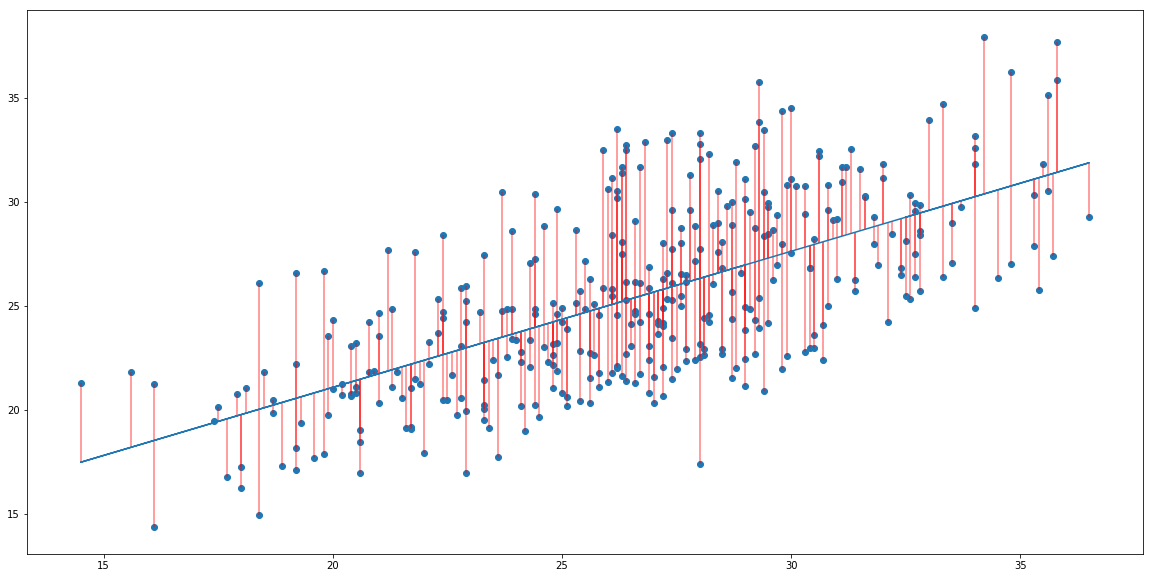

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.plot(x,lin_reg_betas(x, beta_1, beta_0))
ax.scatter(x,y)

ax.vlines(x, y, lin_reg_betas(x, beta_1, beta_0),color='red',alpha=0.5)


plt.show()


# Fin dinámica 2

# Dinámica 3

Regresión lineal multiple, para predecir el precio de una casa. En este caso, trabajaremos con un set de datos de precios de casas del condado de King, Georgia, USA. El set de datos, contiene 21 variables pero no todas van a servir para el proceso de la regresión. Su tarea va a ser seleccionar las variables que va a descartar, y trabajar con el resto de las variables restantes para generar una regresión lineal multiple utilizando numpy para obtener los $\hat{\beta}$. Ademas de esto, calcule el $R^2$ y obtenga las métricas de error $MSE$, $MAE$ y $MAPE$. 

**Desafio:** Puede que el uso de todas las variables, no genere el mejor modelo. Por lo mismo, el **desafio** consiste en implementar el algoritmo de "Step Forward Feature Selection". La idea de este algoritmo, es agregar de a 1 en 1 las variables existentes en nuestro set de datos y ver como mejora el proceso de ajuste de la regresión lineal.

1.- De la posibles variables consideradas en un principio (la cual llamaremos $m$), entrene $m$ modelos de regresión lineal (uno por cada variable), y seleccione la variable que obtenga un mejor $MAE$. 

2.- Con la variable seleccionada, remuevala del conjunto de posibles variables y guardela en una lista de variables seleccionadas (`selected_vars`)

3.- Del conjunto de posibles variables restantes, entrene $m-len(selected\_vars)$ modelos de regresión lineal utilizando las variables restantes en conjunto con `selected_vars`. Seleccione la nueva variable que obtenga un mejor $MAE$. Repita el paso 2. hasta que no quede ninguna variable.

Finalmente, con el procedimiento realizado, y ninguna variable restante en el conjunto de posible variable, imprima por pantalla el mejor conjunto de variables junto con su $MAE$. Adicionalmente, puede gráficar la curva de como va evolucionando el $MAE$ a medida que va agregando variables.

**Nota:** Para el desafio, es recomendable utilizar `LinearRegression` de `scikit-learn` por temas de facilidad de implementación del algoritmo de "Step Forward Feature Selection". Para poder obtener el $\hat{Y}$ utilizando `LinearRegression`, se debe utilizar el método `.predict(X)` posteriormente a haber ajustado el módelo (`.fit(X,y)`), y este computara: 

$$\Large \hat{Y} =  \hat{\beta_0} +X_1\hat{\beta_1}+X_2\hat{\beta_2}+\dots+X_m\hat{\beta_m}$$ 

Ejemplo de uso:

```python
lr = LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(X)
```

In [2]:
housing_df = pd.read_csv("http://srodriguez.me/Datasets/kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
y = housing_df['price'].values
X = housing_df.iloc[:,3:].values
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [6]:
lr = LinearRegression()

lr.fit(X,y)
y_hat = lr.predict(X)
print(r2_score(y,y_hat), mean_squared_error(y,y_hat), mean_absolute_error(y,y_hat))

print(lr.intercept_, lr.coef_)

NameError: name 'LinearRegression' is not defined